In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
# Read in the data
data = pd.read_csv(os.path.join('data', 'intermediate_trainset.csv'))
data.columns = ['episode', 'business_name', 'business_desc', 'deal', 'deal_shark']

In [14]:
# Processing business name to be uniform and free of punctuation marks
data['name_length'] = data.business_name.apply(lambda x: len(x))
data['desc_length'] = data.business_desc.apply(lambda x: len(x))
data['name_word_len'] = data.business_name.apply(lambda x: len(x.split()))
data['desc_word_len'] = data.business_desc.apply(lambda x: len(x.split()))

data['business_name_processed'] = (
    data.business_name
        .str.lower()
        .str.replace(r"['-.]", '', regex=True)
        .str.replace(r'&', 'and', regex=True)
)

data['business_desc_processed'] = (
    data.business_desc
        .str.lower()
        .str.replace(r"['-.]", '', regex=True)
        .str.replace(r'&', 'and', regex=True)
)

data['season'] = (data['episode'] / 100).astype(int)
data['episode'] = (data['episode'] % 100)

data['episode_bin'] = data.episode.apply(lambda x: np.floor(x / 100) * 100)

In [15]:
data

,episode,business_name,business_desc,deal,deal_shark,name_length,desc_length,name_word_len,desc_word_len,business_name_processed,business_desc_processed,episode_bin,detailedness,season
0,26,Laid Brand,hair-care products made with pheromones . Laid...,0,NaN,10,233,2,34,laid brand,haircare products made with pheromones laid b...,0.0,68,8
1,26,Wine & Design,painting classes with wine served . Wine & Des...,1,KOL,13,245,3,38,wine and design,painting classes with wine served wine and de...,0.0,114,8
2,24,Peoples Design,a mixing bowl with a built-in scoop . Peoples ...,1,LG,14,284,2,44,peoples design,a mixing bowl with a builtin scoop peoples de...,0.0,88,8
3,24,Rumi Spice,saffron imported from Afghanistan . Rumi Spice...,1,MC,10,238,2,37,rumi spice,saffron imported from afghanistan rumi spice ...,0.0,74,8
4,24,Wallet Buckle,a belt buckle that holds credit cards . The Wa...,1,RH,13,195,2,36,wallet buckle,a belt buckle that holds credit cards the wal...,0.0,72,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2,Sticky Note Holder,a Post-It note arm for laptops . a Post-It not...,0,NaN,18,63,3,13,sticky note holder,a postit note arm for laptops a postit note a...,0.0,39,1
526,1,College Foxes Packing Boxes,a packing and organizing service based on an a...,0,NaN,27,260,4,39,college foxes packing boxes,a packing and organizing service based on an a...,0.0,156,1
527,1,Ionic Ear,an implantable Bluetooth device requiring surg...,0,NaN,9,158,2,24,ionic ear,an implantable bluetooth device requiring surg...,0.0,48,1
528,1,Mr. Tod's Pie Factory,a pie company,1,BC+DJ,21,14,4,3,mr tods pie factory,a pie company,0.0,12,1


In [6]:
data['detailedness'] = data.name_word_len * data.desc_word_len

<AxesSubplot:xlabel='season', ylabel='detailedness'>

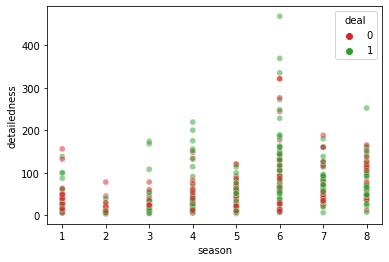

In [19]:
sns.scatterplot(data=data, x='season', y='detailedness', hue='deal', alpha=.5, palette={0:'tab:red', 1:'tab:green'})

<AxesSubplot:ylabel='Frequency'>

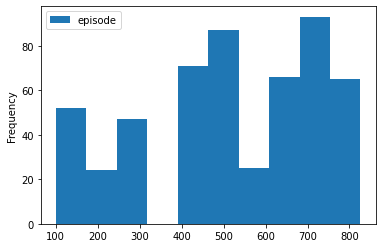

In [9]:
data.plot(kind='hist', x='deal', y='episode', stacked=True)

<AxesSubplot:xlabel='Episode Bin (Episode / 100)'>

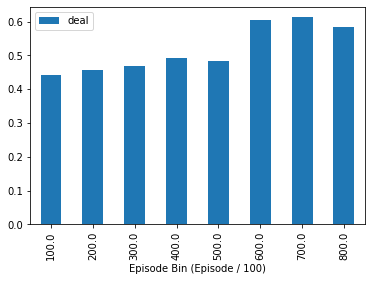

In [10]:
data.groupby('episode_bin').mean().plot(kind='bar', y='deal', xlabel='Episode Bin (Episode / 100)')